# Sentiment Analysis

<h5>Words are powerfull enought to deescribe our sentiments!!!</h5>
<h5>In this project we will analyse tweets  inorder to determine other's sentiments and oppinions. </h5>
<h5>Happy learning :) </h5>

![title](twitter%20image%20%24.jpg)

# Import libs

In [78]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Load data 

In [79]:
# we will strt by reading the csv file 
data = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = 'ISO-8859-1')
# we display the first five rows 
data.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


# Exploratory Data Analysis and Cleaning 

In [80]:
# print the shape of the used data set 
print("the shape of twitter data set is : ", data.shape)

the shape of twitter data set is :  (1048572, 6)


In [81]:
# print the columns name
columns = data.columns 
print("The columns of the folowing data set are : ", "\n", data.columns)

The columns of the folowing data set are :  
 Index(['polarity of tweet ', 'id of the tweet', 'date of the tweet', 'query',
       'user', 'text of the tweet '],
      dtype='object')


In [82]:
# check for empty cells 
data.isnull().sum()

polarity of tweet     0
id of the tweet       0
date of the tweet     0
query                 0
user                  0
text of the tweet     0
dtype: int64

In [83]:
# we will check for duplicates 
data.drop_duplicates(inplace= True)
data.shape

(1048572, 6)

In [84]:
# display a general view of the dataframe columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048572 entries, 0 to 1048571
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   polarity of tweet   1048572 non-null  int64 
 1   id of the tweet     1048572 non-null  int64 
 2   date of the tweet   1048572 non-null  object
 3   query               1048572 non-null  object
 4   user                1048572 non-null  object
 5   text of the tweet   1048572 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


<Axes: >

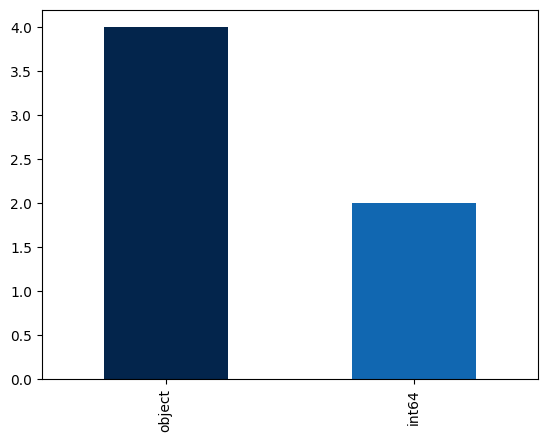

In [85]:
# visualize the total values using a bar plot
data.dtypes.value_counts().plot.bar(color =['#03254c','#1167b1'])

In [86]:
#some statistics calculation 
data.describe()

,polarity of tweet,id of the tweet
count,1.048572e+06,1.048572e+06
mean,9.482458e-01,1.976168e+09
std,1.701122e+00,2.300567e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.824526e+09
50%,0.000000e+00,1.990870e+09
75%,0.000000e+00,2.198903e+09
max,4.000000e+00,2.329206e+09


In [87]:
 # there are many useless columns 
data.drop(columns=['id of the tweet', 'date of the tweet', 'query','user'], axis = 1 , inplace=True)

In [88]:
data.head()

,polarity of tweet,text of the tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [89]:
# we will rename the columns to make the work more easy
data.columns = ['Sentiment', 'Tweet']

In [90]:
data.head()

,Sentiment,Tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [91]:
data.Sentiment.value_counts()

Sentiment
0    799996
4    248576
Name: count, dtype: int64

from the above result we can see that our data set is unbalanced, so we have to deal with it. Thus we will use the undersampling approach to balance our classes  

In [92]:
positive_tweet = data[data['Sentiment'] == 0]
negative_tweet = data[data['Sentiment'] == 4]  

In [93]:
negative_tweet.head()

,Sentiment,Tweet
799996,4,I LOVE @Health4UandPets u guys r the best!!
799997,4,im meeting up with one of my besties tonight! ...
799998,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
799999,4,Being sick can be really cheap when it hurts t...
800000,4,@LovesBrooklyn2 he has that effect on everyone


In [94]:
positive_tweet.head()

,Sentiment,Tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [95]:
# we will select the same number of observations as the negative_tweet
size = len(negative_tweet)
new_positive_tweet = positive_tweet[:size]

In [96]:
len(new_positive_tweet)

248576

In [97]:
new_data = pd.concat([new_positive_tweet,negative_tweet])
new_data.shape
# we get a balanced data set

(497152, 2)

In [98]:
new_data.tail()

,Sentiment,Tweet
1048567,4,My GrandMa is making Dinenr with my Mum
1048568,4,Mid-morning snack time... A bowl of cheese noo...
1048569,4,@ShaDeLa same here say it like from the Termi...
1048570,4,@DestinyHope92 im great thaanks wbuu?
1048571,4,cant wait til her date this weekend


In [99]:
new_data.Sentiment.value_counts()

Sentiment
0    248576
4    248576
Name: count, dtype: int64

Text(0.5, 1.0, 'Positive VS Negative Class')

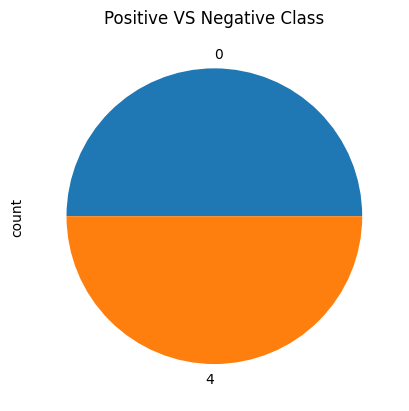

In [100]:
new_data.Sentiment.value_counts().plot.pie()
plt.title("Positive VS Negative Class")

# Model Classification 

In [101]:
x = new_data['Tweet']
y = new_data['Sentiment']

In [102]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

<h7> We will use the TfidfVectorizer to vectorize our text data bfore feeding them to the machine learning algorithm </h7>

In [103]:
# TfidfVectorizer  
tf_vectorizer = TfidfVectorizer(stop_words = 'english')

In [104]:
# Data Vectorization
train_vect = tf_vectorizer.fit_transform(x_train)
test_vect = tf_vectorizer.transform(x_test)

In [105]:
# Model Creation 
model = LogisticRegression(max_iter=1000)

In [106]:
# Model training 
model.fit(train_vect, y_train)

LogisticRegression(max_iter=1000)

In [107]:
# Model testing
y_pred = model.predict(test_vect)

In [108]:
achieved_score = accuracy_score(y_test, y_pred) 
print ("Our Logistic regression model achieved the following score : ", round(achieved_score*100,2),"%")

Our Logistic regression model achieved the following score :  77.48 %


<h4>I hope you found it helpfull !!!</h4>